In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
import random
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from matplotlib import colors
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

# Ejercicio 1

a) Implementar un Generador Congruencial Lineal (GCL) de módulo 232, multiplicador 1013904223, incremento de 1664525 y semilla igual a la parte entera del promedio de los números de padrón de los integrantes del grupo.

In [2]:
SEED = int((99423 + 99616 + 97649 + 99131)/4)
random.seed(SEED)
GCL_PREVIOUS_STATE = SEED

In [3]:
def gcl_generator() -> int:
    global GCL_PREVIOUS_STATE
    new_number = (1013904223 * GCL_PREVIOUS_STATE + 1664525) % 2**32
    GCL_PREVIOUS_STATE = new_number
    return new_number

b) Modificar el GCL implementado en el punto a) para que devuelva números al azar entre 0 y 1

In [4]:
def gcl_between_0_and_1() -> float:
    return gcl_generator()/2**32

c) Realizar los gráficos que considere necesarios para mostrar las distribuciones de números al azar generados en los puntos a) y b)

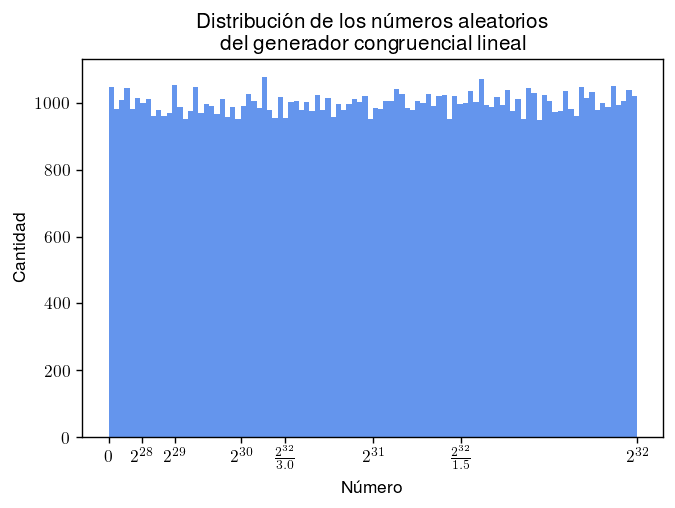

In [5]:
samples_gcl = [gcl_generator() for _ in range(100000)]
plt.figure(dpi=125)
plt.title('Distribución de los números aleatorios\n del generador congruencial lineal')
plt.hist(samples_gcl, bins=100, color="cornflowerblue")
plt.ylabel("Cantidad")
plt.xticks([0]+[2**i for i in range(28,33)]+[2**32/i for i in [3,1.5]],
           [r"$0$"]+[r"$2^{%d}$"%i for i in range(28,33)]+[r"$\frac{2^{32}}{%.1f}$"%i for i in [3,1.5]])
plt.xlabel("Número")
plt.show()

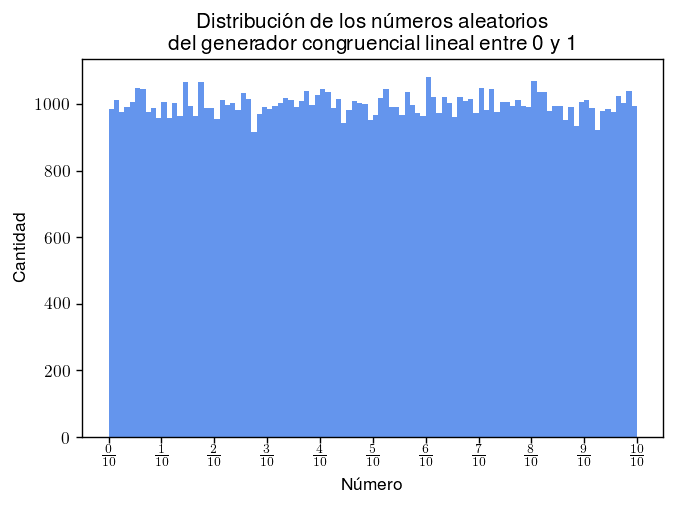

In [6]:
samples_gcl = [gcl_between_0_and_1() for _ in range(100000)]
plt.figure(dpi=125)
plt.title('Distribución de los números aleatorios\n del generador congruencial lineal entre 0 y 1')
plt.hist(samples_gcl, bins=100, color="cornflowerblue")
plt.ylabel("Cantidad")
plt.xticks([i/10 for i in range(0, 11)], [r"$\frac{%d}{10}$"%i for i in range(0, 11)])
plt.xlabel("Número")
plt.show()

# Ejercicio 2

Proponer, y realizar, al menos 2 tests sobre el generador congruencial lineal implementado en el Ejercicio 1.
Evaluar e interpretar los resultados de cada uno.

### Primer test

Realizamos un test chi cuadrado sobre el último dígito del generador con una significancia del 1% y una muestra de tamaño 100.000 a partir de las siguientes hipótesis:

* H0: La distribución es uniforme
* H1: La distribución no es uniforme

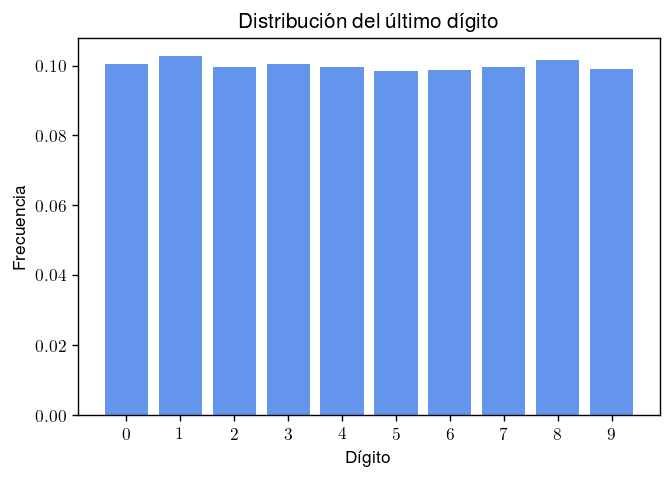

In [7]:
from collections import Counter
GCL_PREVIOUS_STATE = SEED
sample = [str(gcl_generator())[-1] for i in range(100000)]
occurence_counter = Counter(sample)
plt.figure(dpi=125)
plt.title(r"Distribución del último dígito")
plt.bar([r"$%d$"%i for i in range(0,10)], 
        [occurence_counter["%d"%i]/sum(occurence_counter.values()) for i in range(0,10)], 
        color="cornflowerblue")
plt.xlabel("Dígito")
plt.ylabel("Frecuencia")
plt.show()

Como tenemos 10 clases tenemos trabajamos con 9 grados de libertad 

$$X^2_{9,0.99}=21.66$$

Sabemos que la probabilidad de cada dígito debiera ser $p_i=\frac{1}{10}$, calculamos: 

$$D^2=\sum^9_{i=0}{\frac{(n_{obs i}-Np_i)^2}{Np_i}}$$

In [8]:
d_squared = 0
sample_size = sum(occurence_counter.values())
for k in [str(i) for i in range(10)]:
    d_squared += ((occurence_counter[k]-sample_size*0.1)**2)/(sample_size*0.1)
print("D squared is: ", d_squared)

D squared is:  16.9624


Como $D^2=16.9624 < D_α=21.66$ no somos capaces de rechazar **H0**

### Segundo test

Realizamos un test chi cuadrado sobre el primer dígito decimal mod 4 despues de la coma del generador [0,1] con una muestra de 1000 y significacion del 10%
* H0: La distribución es uniforme
* H1: La distribución no es uniforme

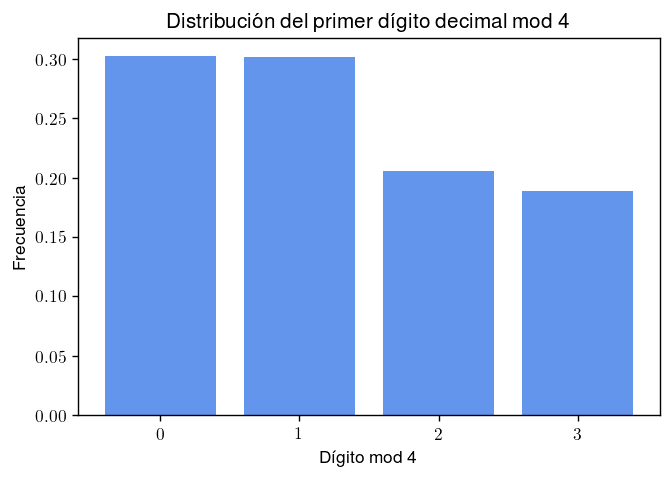

In [9]:
from collections import Counter
GCL_PREVIOUS_STATE = SEED
sample = [int(str(gcl_between_0_and_1())[2]) % 4 for i in range(1000)]
occurence_counter = Counter(sample)
plt.figure(dpi=125)
plt.title(r"Distribución del primer dígito decimal mod 4")
plt.bar([r"$%d$"%i for i in range(0,4)], 
        [occurence_counter[i]/sum(occurence_counter.values()) for i in range(0,4)], 
        color="cornflowerblue")
plt.xlabel(r"Dígito mod 4")
plt.ylabel(r"Frecuencia")
plt.show()

Como tenemos 4 clases tenemos trabajamos con 3 grados de libertad 

$$X^2_{3,0.9}=7.7794$$

Ahora las $p_i$ esperadas para cada dígito son:

$p_0=p_1=\frac{3}{10}$ y $p_2=p_3=\frac{2}{10}$

Calculamos: 

$$D^2=\sum^4_{i=0}{\frac{(n_{obs i}-Np_i)^2}{Np_i}}$$

In [10]:
expected_proba = {0: 3/10, 1: 3/10, 2: 2/10, 3: 2/10}
d_squared = 0
sample_size = sum(occurence_counter.values())
for k in range(4):
    d_squared += (occurence_counter[k]-sample_size*expected_proba[k])**2/(sample_size*0.1)
print("D squared is: ", d_squared)

D squared is:  1.7


Como $D^2=1.7 < D_α=7.7794$ no somos capaces de rechazar **H0**

## Interpretación de los resultados

No _logramos_ rechazar H0 para los tests propuestos y muestras tomadas. Si los tests son lo suficientemente rigurosos para nuestras exigencias, (en diseño del test, significancia y en tamaño de la muestra) no deberíamos notar diferencia entra una distribución uniforme y nuestro generador, por lo que podriamos usarlas indistintamente.

# Ejercicio 3

Se desea generar puntos al azar con distribución uniforme dentro del área descripta en el gráfico utilizando los siguientes generadores de números al azar:

a) Generadores de números al azar con distribución uniforme, provistos por el lenguaje elegido para resolver el tp

Debo encontrar los vertices del cuadrado para encontrar las rectas que delimitan su interior

![](rect.png "")

Para esto podemos plantear un triangulo rectángulo en donde ambos catetos son iguales:

![](rect2.png "")

$10^2=c^2 + c^2 \rightarrow 10^2=2*c^2 \rightarrow 50=c^2 \rightarrow c=\sqrt{50} \lor c=-\sqrt{50}$

Como sabemos que c>0 entonces c es la raiz de 5.

Entonces los puntos A, B, C y D son:

$\vec{A}=(20, 20+\sqrt{50})$, $\vec{B}=(20+\sqrt{50}, 20)$, $\vec{C}=(20, 20-\sqrt{50})$ y $\vec{D}=(20-\sqrt{50}, 20)$

Con estos puntos podemos calcular la recta entre los pares AB, BC, CD y DA:

$$y=m*x+b\\
m = \frac{y_2-y_1}{x_2-x_1}$$

Entonces las rectas nos quedan:

$$y_{\vec{AB}}(x) = -x + 40 + \sqrt{50}\\
y_{\vec{BC}}(x) = x - \sqrt{50}\\
y_{\vec{CD}}(x) = -x + 40 - \sqrt{50}\\
y_{\vec{DA}}(x) = x + \sqrt{50}$$

Un punto en funcion de x es válido si y solo si $x>20-\sqrt{50} \land x<20+\sqrt{50}$ y:

$$ y \leq  \left\{
\begin{array}{ll}
      y_{\vec{AB}}(x) & x\geq20 \\
      y_{\vec{DA}}(x) & x<20 \\
\end{array} 
\right. \\
 y \geq  \left\{
\begin{array}{ll}
      y_{\vec{BC}}(x) & x\geq20 \\
      y_{\vec{CD}}(x) & x<20 \\
\end{array} 
\right.$$ 

Se programaran funciones en python que con estas reglas dada una tupla (x,y) indique si está o no dentro de la figura.

In [11]:
def yab(x):
    return -x + 40 + 50**(1/2)

def ybc(x):
    return x - 50**(1/2)

def ycd(x):
    return -x + 40 - 50**(1/2)

def yda(x):
    return x + 50**(1/2)

def point_valid(x,y) -> bool:
    if x<20-50**(1/2) or x>20+50**(1/2):
        return False
    if x>=20:
        return y>=ybc(x) and y<=yab(x)
    else:
        return y>=ycd(x) and y<=yda(x)

Generamos ahora la figura pedida utilizando dos uniformes [$20-\sqrt{50}$, $20+\sqrt{50}$]

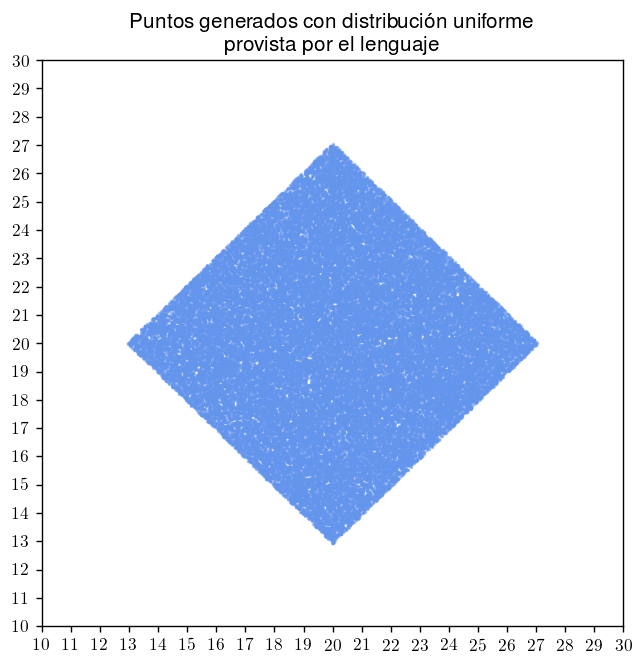

In [12]:
random.seed(SEED)
points = []
for i in range(100000):
    x = random.uniform(20-50**(1/2), 20+50**(1/2))
    y = random.uniform(20-50**(1/2), 20+50**(1/2))
    if point_valid(x,y):
        points.append((x,y))
plt.figure(dpi=125, figsize=(6, 6))
plt.scatter([p[0] for p in points], [p[1] for p in points], color="cornflowerblue", alpha=0.5, s=1)
plt.xticks([i for i in range(10,31)],[r"$%d$"%i for i in range(10,31)])
plt.yticks([i for i in range(10,31)],[r"$%d$"%i for i in range(10,31)])
plt.title("Puntos generados con distribución uniforme\n provista por el lenguaje")
plt.show()

b) Generadores de números al azar implementados con el algoritmo del ejercicio 1.

Vamos a generar tambien puntos con dos uniformes [$20-\sqrt{50}$, $20+\sqrt{50}$] pero utilizando nuestro generador

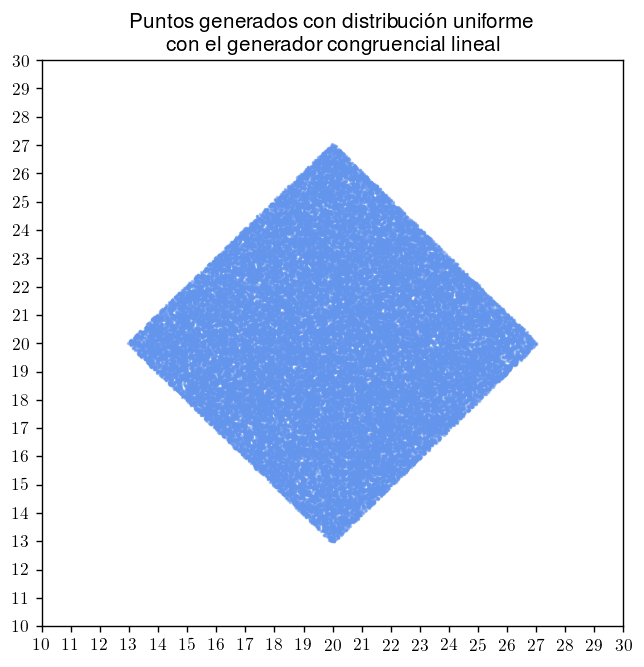

In [13]:
GCL_PREVIOUS_STATE = SEED
points = []
for i in range(100000):
    x = 20-50**(1/2) + gcl_between_0_and_1()*2*(50**(1/2))
    y = 20-50**(1/2) + gcl_between_0_and_1()*2*(50**(1/2))
    if point_valid(x,y):
        points.append((x,y))
plt.figure(dpi=125, figsize=(6, 6))
plt.scatter([p[0] for p in points], [p[1] for p in points], color="cornflowerblue", alpha=0.5, s=1)
plt.xticks([i for i in range(10,31)],[r"$%d$"%i for i in range(10,31)])
plt.yticks([i for i in range(10,31)],[r"$%d$"%i for i in range(10,31)])
plt.title("Puntos generados con distribución uniforme\n con el generador congruencial lineal")
plt.show()

c) Calcule el factor de rendimiento del método.

El factor de rendimiento es los puntos que estamos utilizando sobre los puntos totales generados

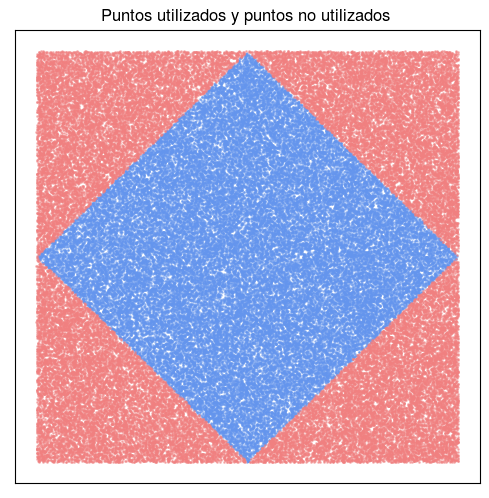

In [14]:
random.seed(SEED)
points = []
unused_points = []
for i in range(100000):
    x = random.uniform(20-50**(1/2), 20+50**(1/2))
    y = random.uniform(20-50**(1/2), 20+50**(1/2))
    if point_valid(x,y):
        points.append((x,y))
    else:
        unused_points.append((x,y))
plt.figure(dpi=100, figsize=(6, 6))
plt.scatter([p[0] for p in points], [p[1] for p in points], color="cornflowerblue", alpha=0.5, s=1, label="Puntos útiles")
plt.scatter([p[0] for p in unused_points], [p[1] for p in unused_points], color="lightcoral", alpha=0.5, s=1, label="Puntos no utilizados")
plt.xticks([],[])
plt.yticks([],[])
plt.title("Puntos utilizados y puntos no utilizados")
plt.show()

Como la densidad es proporcional al area total solo debemos calcular

$$\frac{Area\ util}{Area\ total}$$

Donde el area útil es la correspondiente a la de un cuadrado de 10x10, osea 100. El area total generada con las uniformes es la correspondiente a un cuadrado de lado $2\sqrt{50}=14.1421$, por lo que el area es 200.

El factor de rendimiento entonces es:

$$\frac{100}{200}=0.5$$

d) Proponga el test que considere necesario para demostrar que los números generados siguen la distribución pedida.

Si rotamos los puntos generados 45° respecto del centro (20,20) obtendremos un cuadrado tal que:

$$y\geq20-\sqrt{50} \land y\leq20+\sqrt{50}\\
x\geq20-\sqrt{50} \land x\leq20+\sqrt{50}$$

Podremos dividirlo en una grilla de 5x5 cuadrantes iguales en donde cada cuadrante sea equiprobable y hacer un test chi-cuadrado con significacia 10% y 100000 muestras para la equiprobabilidad de la cantidad de puntos en esos cuadrantes.

* H0: La distribución es uniforme
* H1: La distribución no es uniforme

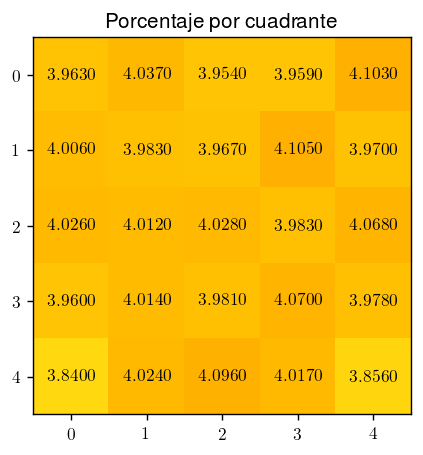

In [15]:
import math
def transform_in_unitary_square(x,y):
    new_x = (x-20)*math.cos(math.pi/4)-(y-20)*math.sin(math.pi/4)
    new_y = (x-20)*math.cos(math.pi/4)+(y-20)*math.sin(math.pi/4)
    new_x /= 10
    new_y /= 10
    new_x += 0.5
    new_y += 0.5
    return new_x, new_y
    
def get_quadrant_tuple(x,y):
    x, y = transform_in_unitary_square(x,y)
    x_q = 4
    y_q = 4
    if x<(1/5):
        x_q = 0
    elif x>=(1/5) and x<(2/5):
        x_q = 1
    elif x>=(2/5) and x<(3/5):
        x_q = 2
    elif x>=(3/5) and x<(4/5):
        x_q = 3
    x = None
    
    if y<(1/5):
        y_q = 0
    elif y>=(1/5) and y<(2/5):
        y_q = 1
    elif y>=(2/5) and y<(3/5):
        y_q = 2
    elif y>=(3/5) and y<(4/5):
        y_q = 3
    
    return x_q, y_q

GCL_PREVIOUS_STATE = SEED
points = []
while len(points)<100000:
    x = 20-50**(1/2) + gcl_between_0_and_1()*2*(50**(1/2))
    y = 20-50**(1/2) + gcl_between_0_and_1()*2*(50**(1/2))
    if point_valid(x,y):
        points.append((x,y))

quadrants = []
for p in points:
    quadrants.append(get_quadrant_tuple(p[0], p[1]))
quadrant_occurences = Counter(quadrants)
quadrant_matrix = np.zeros((5,5))
for i in range(5):
    for j in range(5):
        quadrant_matrix[i][j] = quadrant_occurences[(i,j)]
plt.figure(dpi=125)
plt.title("Porcentaje por cuadrante")
plt.imshow(quadrant_matrix/quadrant_matrix.sum(), cmap="Wistia",vmin=0.035,vmax=0.045)
for i in range(5):
    for j in range(5):
        plt.gca().text(j, i, r"$%.4f$"%(100*quadrant_matrix[i][j]/quadrant_matrix.sum()), 
                       ha="center", va="center", color="black")

Como tenemos 25 clases tenemos trabajamos con 24 grados de libertad 

$$X^2_{24,0.9}=33.1962$$

Las $p_i$ para cada cuadrante son:

$p_i=\frac{1}{25}$

Calculamos: 

$$D^2=\sum^24_{i=0}{\frac{(n_{obs i}-Np_i)^2}{Np_i}}$$

In [16]:
expected_proba = 1/25
d_squared = 0
sample_size = sum(quadrant_occurences.values())
for i in range(5):
    for j in range(5):
        d_squared += (quadrant_occurences[(i,j)]-sample_size*expected_proba)**2/(sample_size*0.1)
print("D squared is: ", d_squared)

D squared is:  10.0958


Como $D^2=10.0958 < D_α=33.1962$ no somos capaces de rechazar **H0**

# Ejercicio 4

Para la siguiente densidad de probabilidad, se pide:

a) Definir la función de densidad de probabilidad.

La funcion densidad de probabilidad es:

$$ f_x(x)=  \left\{
\begin{array}{ll}
      (x-1)*\frac{1}{9} & x>1 \land x<2 \\
      \frac{1}{9} & x\geq2 \land x<5 \\
      (x-5)*\frac{\frac{1}{5}-\frac{1}{9}}{2}+\frac{1}{9} & x\geq5 \land x<7 \\
      (x-7)*\frac{-1}{15}+\frac{1}{5} & x\geq7 \land x<10 \\
      0 & e.o.c. \\
\end{array} 
\right. $$ 

Verificamos que es una función de densidad válida:

$$\int_{-\infty}^{\infty} f_x(x)\ dx=\int_{1}^{2} (x-1)*\frac{1}{9}\ dx + 
\int_{2}^{5} \frac{1}{9}\ dx + 
\int_{5}^{7} (x-5)*\frac{\frac{1}{5}-\frac{1}{9}}{2}+\frac{1}{9}\ dx + 
\int_{7}^{10} (x-7)*\frac{-1}{15}+\frac{1}{5}\ dx\\
\int_{-\infty}^{\infty} f_x(x)\ dx = \frac{1}{18} + \frac{1}{3} + \frac{14}{45} + \frac{3}{10} = 1$$

b) Calcular y graficar la función de probabilidad acumulada y su inversa.

$$F_x(x)=\int_{-\infty}^{x} f_x(x)\ dx= \left\{
\begin{array}{ll}
      0 & x\leq1 \\
      (\frac{x^2}{2}-x)*\frac{1}{9}\rvert_{1}^{x} & x\geq1 \land x\leq2 \\
      (\frac{x^2}{2}-x)*\frac{1}{9}\rvert_{1}^{2} + 
      \frac{x}{9}\rvert_{2}^{x} & x>2 \land x\leq5 \\
      (\frac{x^2}{2}-x)*\frac{1}{9}\rvert_{1}^{2} + 
      \frac{x}{9}\rvert_{2}^{5} +
      \frac{1}{45}(x^2-5x)\rvert_{5}^{x} & x>5 \land x\leq7 \\
      (\frac{x^2}{2}-x)*\frac{1}{9}\rvert_{1}^{2} + 
      \frac{x}{9}\rvert_{2}^{5} +
      \frac{1}{45}(x^2-5x)\rvert_{5}^{7} +
      (\frac{2x}{3}-\frac{x^2}{30})\rvert_{7}^{x} & x>7 \land x\leq10 \\
      1 & x>10 \\
\end{array} 
\right. $$

In [17]:
def barrow(fun, inf, sup):
    return fun(sup)-fun(inf)

assert round(barrow(lambda x: ((x**2)/2-x)*(1/9), 1, 2), 5) == round((1/18), 5)
assert round(barrow(lambda x: (x/9), 2, 5), 5) == round((1/3), 5)
assert round(barrow(lambda x: (1/45)*(x**2-5*x), 5, 7), 5) == round((14/45), 5)
assert round(barrow(lambda x: ((2*x/3)-(x**2/30)), 7, 10), 5) == round((3/10), 5)

def pmf_x(x):
    if x<=1:
        return 0
    elif x>1 and x<=2:
        return barrow(lambda x: ((x**2)/2-x)*(1/9), 1, x)
    elif x>2 and x<=5:
        return pmf_x(2) + barrow(lambda x: (x/9), 2, x)
    elif x>5 and x<=7:
        return pmf_x(5) + barrow(lambda x: (1/45)*(x**2-5*x), 5, x)
    elif x>7 and x<=10:
        return pmf_x(7) + barrow(lambda x: ((2*x/3)-(x**2/30)), 7, x)
    return 1

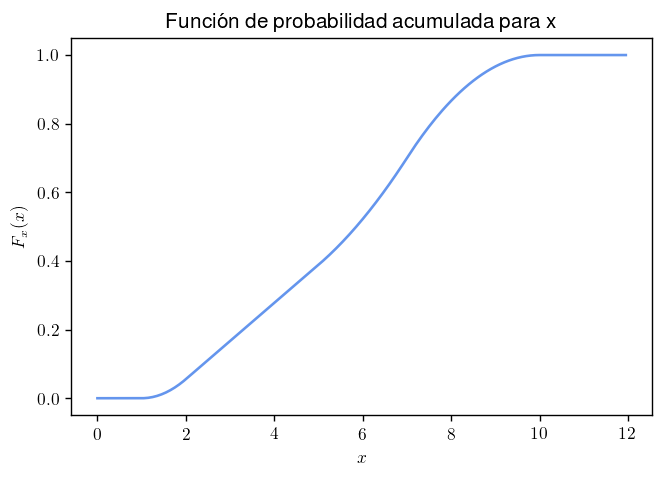

In [18]:
points = np.arange(0, 12, 0.05).tolist()
values = [pmf_x(p) for p in np.arange(0, 12, 0.05)]
plt.figure(dpi=125)
plt.plot(points, values, color="cornflowerblue")
plt.title("Función de probabilidad acumulada para x")
plt.xlabel(r"$x$")
plt.ylabel(r"$F_x(x)$")
plt.show()

Continuamos con la función inversa. Debido a la complejidad analítica de la función de probabilidad acumulada utilizaremos una aproximación basada en búsqueda binaria con una precisión fija de 5 decimales.

In [19]:
def approximate_inverse_pmf(pmf, p, minimum=-1000, maximum=1000):
    sup_pivot = maximum
    inf_pivot = minimum
    x = (inf_pivot+sup_pivot)/2
    actual_p = pmf(x)
    while round(actual_p, 5) != round(p, 5):
        if actual_p < p:
            inf_pivot = x
        else:
            sup_pivot = x
        x = (inf_pivot+sup_pivot)/2
        actual_p = pmf(x)
    return x

assert round(approximate_inverse_pmf(pmf_x, 7/18, 1, 11)) == round(5, 5)
assert round(approximate_inverse_pmf(pmf_x, 7/10, 1, 11)) == round(7, 5)

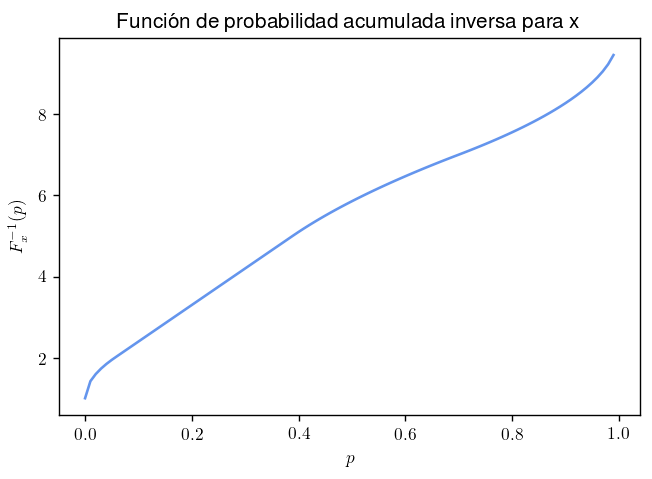

In [20]:
points = np.arange(0, 1, 0.01).tolist()
values = [approximate_inverse_pmf(pmf_x, p, 1, 11) for p in np.arange(0, 1, 0.01)]
plt.figure(dpi=125)
plt.plot(points, values, color="cornflowerblue")
plt.title("Función de probabilidad acumulada inversa para x")
plt.xlabel(r"$p$")
plt.ylabel(r"$F^{-1}_x(p)$")
plt.show()

c) Utilizando el generador de números aleatorios con distribución uniforme [0,1] implementado en el ejercicio 1 y aplicando el método de la transformada inversa, genere números al azar con la distribución propuesta.

Para generar números con el método de la transformada inversa a partir de una $\mathcal{U} \sim (0,1)$ a la distribucion de $X$ se debe:

1. Obtener un número $u_i$ de la uniforme
2. Con la función de probabilidad acumulada de la uniforme $F_u$ calcular la probabilidad acumulada de ese número $F_u(u_i)$
3. Con la probabilidad $F_u(u_i)=p_i$ obtener un número $x_i$ por medio de $F^{-1}_x(p_i)$

Este procedimiento se debe repetir para cuantos números se deseen. Obtendremos 100mil números de la distribución de $X$.
Sabemos que la PMF de la $\mathcal{U} \sim (0,1)$ es $F_u(u)=u$

In [21]:
GCL_PREVIOUS_STATE = SEED
x_samples = []
for i in range(100000):
    ui = gcl_between_0_and_1()
    pi=ui
    xi=approximate_inverse_pmf(pmf_x, pi, 1, 11)
    x_samples.append(xi)

d) Realice los gráficos que considere necesarios para mostrar la distribución de números al azar generados.

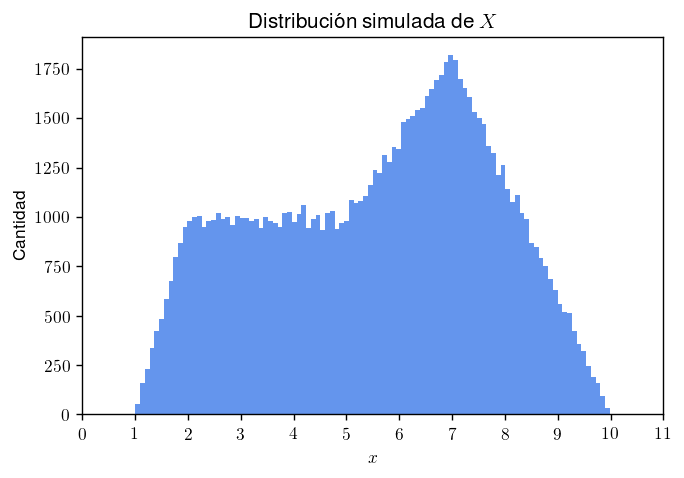

In [22]:
plt.figure(dpi=125)
plt.hist(x_samples, bins=100, color="cornflowerblue")
plt.title(r"Distribución simulada de $X$")
plt.xticks(list(range(12)), [r"$%d$"%i for i in range(12)])
plt.xlabel("$x$")
plt.ylabel("Cantidad")
plt.show()

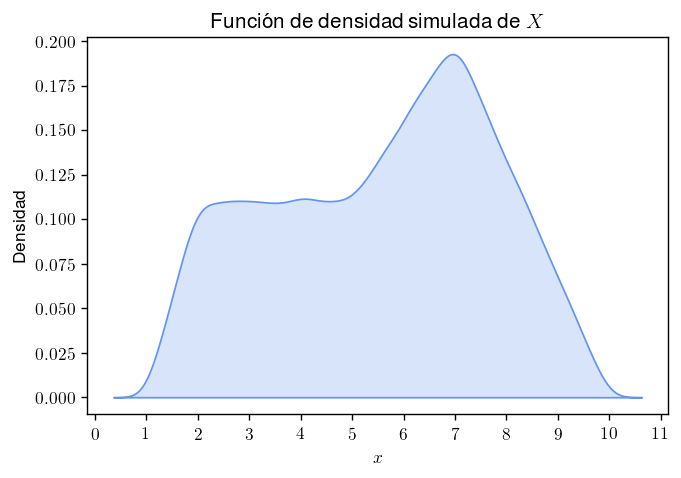

In [23]:
fig, ax = plt.subplots(dpi=125)
sns.kdeplot(x_samples, color="cornflowerblue", fill=True, ax=ax)
plt.title("Función de densidad simulada de $X$")
plt.xticks(list(range(12)), ["$%d$"%i for i in range(12)])
plt.xlabel("$x$")
plt.ylabel("Densidad")
plt.show()

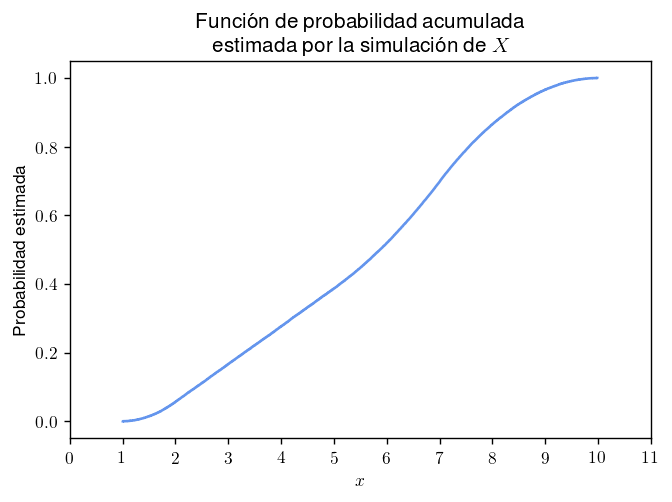

In [24]:
fig, ax = plt.subplots(dpi=125)
sns.ecdfplot(x_samples, color="cornflowerblue", ax=ax)
plt.title("Función de probabilidad acumulada\n estimada por la simulación de $X$")
plt.xticks(list(range(12)), ["$%d$"%i for i in range(12)])
plt.xlabel("$x$")
plt.ylabel("Probabilidad estimada")
plt.show()

# Ejercicio 5

a) Desarrolle un algoritmo para generar la distribución de probabilidad anterior utilizando el generador de números
aleatorios implementado en el ejercicio 1

Para generar la variable pedida dividimos el espacio muestral de nuestra uniforme tal que la probabilidad de caer en una de las divisiones coincida con la probabilidad del valor correspondiente de la distribución discreta. Para el caso particular de la $\mathcal{U} \sim (0,1)$ la probabilidad es igual a la longitud.

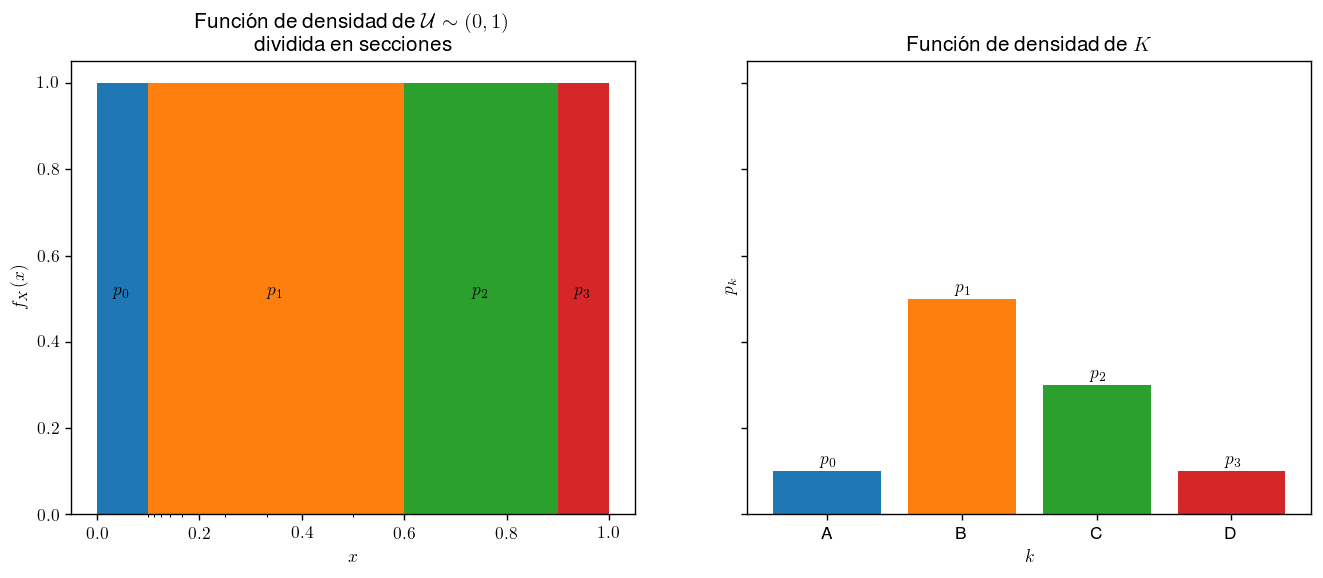

In [25]:
fig, axs = plt.subplots(1, 2, dpi=125, figsize=(6.4*2, 4.8), sharey=True)
axs[0].hist([0.05], bins=[0, 0.1])
axs[0].hist([0.2], bins=[0.1, 0.6])
axs[0].hist([0.7], bins=[0.6, 0.9])
axs[0].hist([0.95], bins=[0.9, 1])
axs[0].text(0.05-0.02, 0.5, "$p_0$")
axs[0].text(0.35-0.02, 0.5, "$p_1$")
axs[0].text(0.75-0.02, 0.5, "$p_2$")
axs[0].text(0.95-0.02, 0.5, "$p_3$")
axs[0].set_title("Función de densidad de $\mathcal{U} \sim (0,1)$\n dividida en secciones")
axs[0].set_xlabel("$x$")
axs[0].set_ylabel("$f_X(x)$")
axs[0].set_xticks([1/i for i in range(1,11)], ["$\frac{1}{%d}$"%i for i in range(1,11)])
b1= axs[1].bar(["A"], [0.1])
b2= axs[1].bar(["B"], [0.5])
b3= axs[1].bar(["C"], [0.3])
b4= axs[1].bar(["D"], [0.1])
i=0
for rect in b1 + b2 + b3 + b4:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '$p_%d$' % i, ha='center', va='bottom')
    i+=1
axs[1].set_title("Función de densidad de $K$")
axs[1].set_ylabel("$p_k$")
axs[1].set_xlabel("$k$")
plt.show()

Entonces para simular la variable:
1. Tomamos una muestra $x_i$ de la uniforme
2. Nos fijamos en que intervalo cae
3. Asignamos según el intervalo esa muestra al correspondiente $k_i$

Repetimos este proceso las veces que sean necesarias, en este caso tomaremos una muestra de tamaño 100mil.

In [26]:
GCL_PREVIOUS_STATE=SEED
k_samples = []
for _ in range(1000000):
    xi = gcl_between_0_and_1()
    if xi<= 0.1:
        k_samples.append("A")
    elif xi<=0.6:
        k_samples.append("B")
    elif xi<=0.9:
        k_samples.append("C")
    else:
        k_samples.append("D")

b) Mostrar la distribución obtenida en un histograma.

/home/ana/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


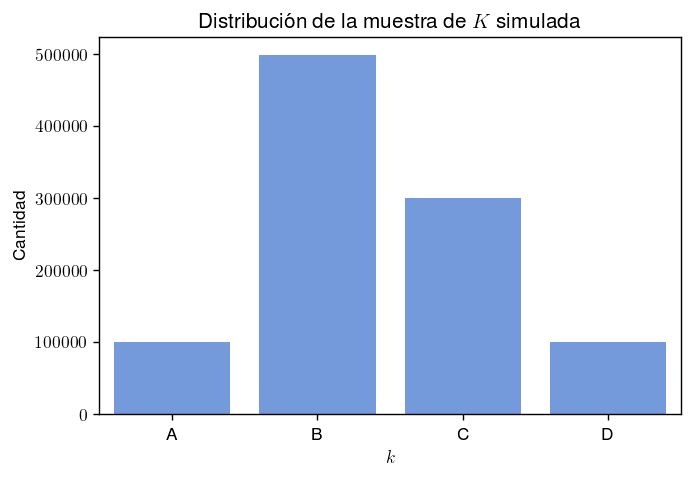

In [27]:
plt.figure(dpi=125)
sns.countplot(k_samples, color="cornflowerblue", order=["A", "B", "C", "D"])
plt.xlabel("$k$")
plt.ylabel("Cantidad")
plt.title("Distribución de la muestra de $K$ simulada")
plt.show()

c) Proponga un test para aplicarle a los números al azar generados, y evalúe si los mismos pueden ser aceptados.

Proponemos el test chi cuadrado con una significancia del 1% para las siguientes hipótesis:
* H0: La distribución simulada se distribuye como $K$
* H1: La distribución simulada no se distribuye como $K$

Al tener 4 valores posibles tenemos 3 grados de libertad por lo que

$$X^2_{3,0.99}=11.345$$

Sabemos que la probabilidad de cada dígito debiera ser $p_k$, calculamos: 

$$D^2=\sum^D_{A}{\frac{(n_{obs k}-Np_k)^2}{Np_k}}$$

In [28]:
k_frequencies = Counter(k_samples)
expected_proba = {"A": 0.1, "B": 0.5, "C": 0.3, "D": 0.1}
d_squared = 0
sample_size = sum(k_frequencies.values())
for k in k_frequencies.keys():
    d_squared += (k_frequencies[k]-sample_size*expected_proba[k])**2/(sample_size*0.1)
print("D squared is: ", d_squared)

D squared is:  9.33826


Como $D^2=9.33826 < D_α=11.345$ no somos capaces de rechazar **H0**

# Ejercicio 6

a) Generar 2 distribuciones normales independientes. Una con media 10 y desvío 2, y la otra con media 20 y desvío 15.

Para generar las muestras de la primer variable gaussiana utilizaremos el método de Aceptación Rechazo II. Generaremos muestras para una variable normal estánder con media 0 y desvío 1, y luego realizaremos un escalamiento y una traslación, multiplicando por el desvío deseado y sumando la media deseada respectivamente. Empecemos describiendo el método.

Conocemos como generar una variable aleatoria $Y$ con función densidad de probabilidad $f_y(t)$. 
Para generar la variable aleatoria X con función densidad de probabilidad $f_x(t)$, seguimos los siguientes pasos:

1 - Encontramos una variable aleatoria $Y$ tal que $f_y(t)$ > 0 $\Leftrightarrow$ $f_x(t)$ > 0. Sea $c$ una constante tal que:

$$\frac{f_x(t)}{f_y(t)} \leq c, \forall t: f_x(t) > 0$$

2 - Generamos una instancia $t$ de $Y$.

3 - Con probabilidad $\frac{f_x(t)}{c \cdot f_y(t)}$, aceptar $X = t$. Caso contrario, rechazar $t$ y volver al paso 2.

Para generar la variable aleatoria, queremos que $f_x(t) \leq c \cdot f_y(t)$.

Buscaremos entonces generar muestras para la normal con $\mu = 0$ y $\sigma^2 = 1$. Una buena idea es generar $X = |N|$, y luego multiplicar $N$ por -1 con probabilidad 0.5. . Para esto, elegimos que $Y$ se distribuya como una exponencial de media 1 ($\lambda=1$). 



Busquemos entonces la constante $c$. Para esto, calculamos el cociente entre las funciones de densidad de $X$ e $Y$:

$\frac{f_x(t)}{f_y(t)} = \frac{1}{\sqrt{2\pi}} e^{-\frac{t^{2}}{2}} \cdot \frac{1}{e^{-t}} = \frac{1}{\sqrt{2\pi}} e^{-\frac{t^{2}}{2} + t}$

Y buscamos maximizarlo. Está claro que el cociente será máximo cuando maximicemos la exponencial. Esto, a su vez, implica maximizar el exponente $t - \frac{t^{2}}{2}$:

$\frac{d}{dt} (t - \frac{t^{2}}{2}) = 1 - t$ => El máximo de la función cuadrática se da en $t=1$, punto el cual podemos calcula la constante $c$:  

$c = \frac{f_x(1)}{f_x(1)} = \frac{1}{\sqrt{2\pi}} e^{-\frac{1}{2}} \cdot \frac{1}{e^{-1}} = \sqrt{\frac{e}{2\pi}}$

Habiendo encontra $c$, podemos simular para encontrar la normal estándar:

In [29]:
np.random.seed(SEED)
c = np.sqrt((np.exp(1) / (2 * np.pi)))
probabilidad_de_aceptacion = lambda t: np.exp(-t**2/2) / np.sqrt(2*np.pi) * 1 / (c * np.exp(-t))
muestra_exponencial = np.random.exponential(1, 100000)
muestra_normal_estandar = []
for t in muestra_exponencial:
    aux_prob_1 = np.random.uniform()
    if aux_prob_1 < probabilidad_de_aceptacion(t):
        aux_prob_2 = np.random.uniform()
        if aux_prob_2 < 0.5:
            muestra_normal_estandar.append(t)
        else:
            muestra_normal_estandar.append(-t)
print("Total de muestras generadas:", len(muestra_normal_estandar))

Total de muestras generadas: 75915


In [30]:
#Esta bien el desvio o deberiamos poner 4 en vez de 2?
desvio = 2
media = 10
muestra_normal_2_10 = np.add(np.multiply(np.array(muestra_normal_estandar), desvio), media)

Para generar la segunda de nuestras normales utilizaremos el método de superposición en combinación con el Teorema Central del Límite. El método de superposición nos dice que ciertas variables aleatorias pueden escribirse como la suma de las variables aleatorias individuales que la componen:

$X = X_1 + X_2 + .. + X_N$

El Teorema Central del Límite enuncia lo siguiente. Sea $S_n$ la suma $n$ variables aleatorias independientes idénticamente distribuidas con media finita $E[X] = \mu$ y varianza finita $\sigma^{2}$, y sea $Z_n$ la variable aleatoria de media cero definida por:

$Z_n = \frac{S_n - n \mu}{\sigma \sqrt{n}}$ 

Entonces, se cumple que:

$lim_{n\to\infty} P[Z_n \leq z] = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{z} e^{-\frac{x^{2}}{2}}\ dx$

Esto quiere decir que si tomamos $n$ lo suficientemente grande, podemos generar muestras de una normal estándar a partir de muestras de otra variable aleatoria que sepamos generar utilizando el método de superposición.

Entonces, llevemos adelante el experimento utilizando muestras de una variable distribuida uniformemente:

In [31]:
n = 10000
media_uniforme = 1/2
desvio_uniforme = np.sqrt(1/12)
muestras_normal_estandar_2 = [(np.sum(np.random.uniform(0, 1, n)) - n * media_uniforme) / (desvio_uniforme * np.sqrt(n)) for _ in range(100000) ] 

In [32]:
desvio = 15
media = 20
muestra_normal_15_20 = np.add(np.multiply(np.array(muestras_normal_estandar_2), desvio), media)

b) Muestre gráficamente las distribuciones de números al azar generadas.

Graficamos los histogramas para cada una de las muestras. Esperamos ver que tengan la forma de las gaussianas especificadas en el enunciado.

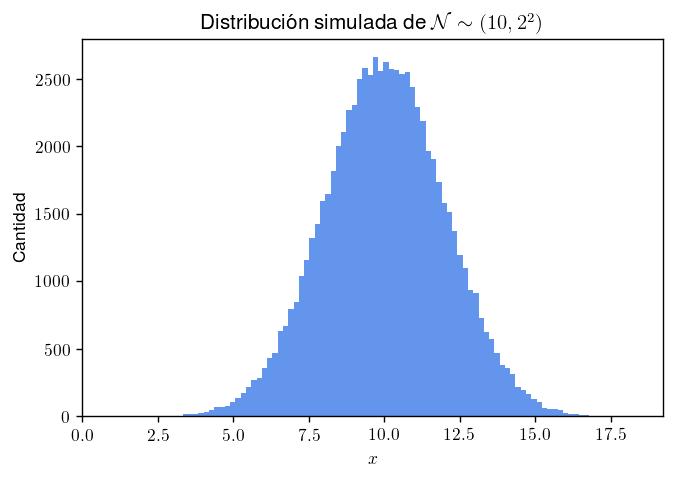

In [33]:
plt.figure(dpi=125)
plt.hist(muestra_normal_2_10, bins=100, color="cornflowerblue")
plt.title(r"Distribución simulada de $\mathcal{N} \sim (10,2^{2})$")
plt.xlabel("$x$")
plt.ylabel("Cantidad")
plt.show()

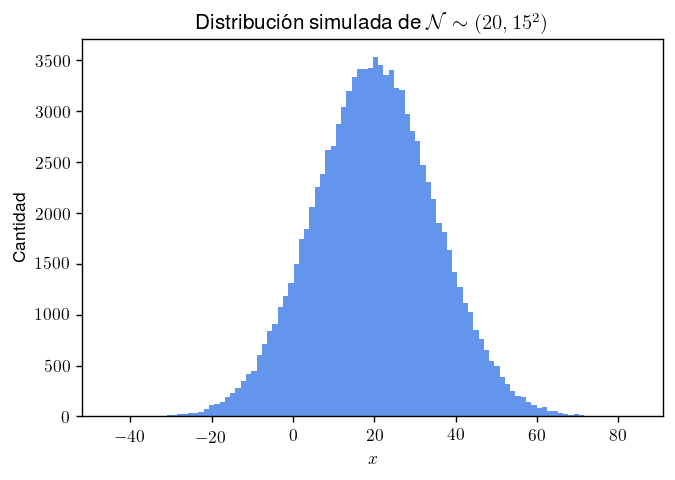

In [34]:
plt.figure(dpi=125)
plt.hist(muestra_normal_15_20, bins=100, color="cornflowerblue")
plt.title(r"Distribución simulada de $\mathcal{N} \sim (20,15^{2})$")
plt.xlabel("$x$")
plt.ylabel("Cantidad")
plt.show()

c) Calcular la media y la varianza de la distribución obtenida y compararlos con los valores teóricos.

Sean $\mathcal{X_1} \sim N(10,2^{2})$ y $\mathcal{X_2} \sim N(20,15^{2})$ las variables generadas en el inciso anterior. Buscamos calcular $\overline{X_1}, \overline{S_1}^{2}, \overline{X_2}, \overline{S_2}^{2}$, es decir los estimadores puntuales para la media y la varianza de la distribución, y los comparamos con sus valores teóricos.

In [35]:
x_1 = np.sum(muestra_normal_2_10) / len(muestra_normal_2_10)
print("La media de la primer variable simulada es:", x_1)
s_1 = np.sum([(x_i - x_1)**2 for x_i in muestra_normal_2_10]) / len(muestra_normal_2_10)
print("La varianza de la segunda variable simulada es:", s_1)

La media de la primer variable simulada es: 10.013805157536451
La varianza de la segunda variable simulada es: 4.000221264738542


Vemos que tanto la media $\overline{X_1} $ como la varianza $\overline{S_1}^{2}$ coinciden, excepto por algunos decimales, con los valores esperados para la variable que se quiso simular.

Ahora, realicemos los mismos cálculos para la distribución obtenida en la segunda gaussiana simulada:

In [36]:
x_2 = np.sum(muestra_normal_15_20) / len(muestra_normal_15_20)
print("La media de la primer variable simulada es:", x_2)
s_2 = np.sum([(x_i - x_2)**2 for x_i in muestra_normal_15_20]) / len(muestra_normal_15_20)
print("La varianza de la segunda variable simulada es:", s_2)

La media de la primer variable simulada es: 20.019910344564064
La varianza de la segunda variable simulada es: 224.65450745368403


Tal como para la primera simulación, la media $\overline{X_2} $ como la varianza $\overline{S_2}^{2}$ coinciden, con los valores esperados (a excepción de algunos decimales) para la variable que se quiso simular.

d) Utilizar las distribuciones generadas en el punto a) para generar una distribución normal bivariada.

En la sección anterior fueron generadas distribuciones gaussianas en forma independiente. Esto implica que están conjuntamente distribuidas en forma normal. Matemáticamente, significa que el par $(\mathcal{X} \sim N(20,15^{2}), \mathcal{X} \sim N(10,2^{2}))$ debe tener una distribución normal bivariada. Por lo tanto, para generar la distribución multivariada solicitada, podemos simplemente hacer un $stacking$ de las distribuciones generadas previamente.

In [37]:
multivariada = np.vstack((muestra_normal_2_10[:min(len(muestra_normal_2_10), len(muestra_normal_15_20))], muestra_normal_15_20[:min(len(muestra_normal_2_10), len(muestra_normal_15_20))]))

e) Graficar la distribución obtenida en el punto d).

Para comenzar, realizamos un gráfico de las curvas de nivel de la distribución que obtuvimos.

/home/ana/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'Y'),
 Text(0.5, 0, 'X'),
 Text(0.5, 1.0, 'Curvas de nivel distribución multivariada')]

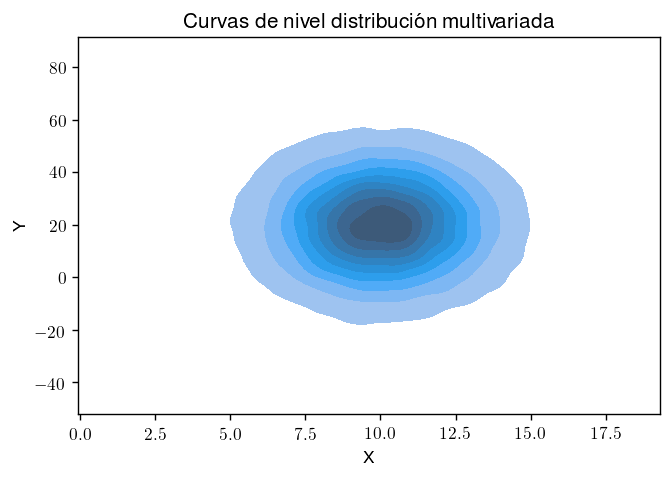

In [38]:
plt.figure(dpi=125)
sns.kdeplot(multivariada[0], multivariada[1], fill=True).set(title='Curvas de nivel distribución multivariada', xlabel='X', ylabel='Y')

Finalmente, realizamos un gráfico de la función obtenida en tres dimensiones.

In [39]:
X, Y = np.mgrid[min(multivariada[0]):max(multivariada[0]):100j, min(multivariada[1]):max(multivariada[1]):100j]
positions = np.vstack([X.ravel(), Y.ravel()])
kernel = stats.gaussian_kde(multivariada)

Z = np.reshape(kernel(positions).T, X.shape)

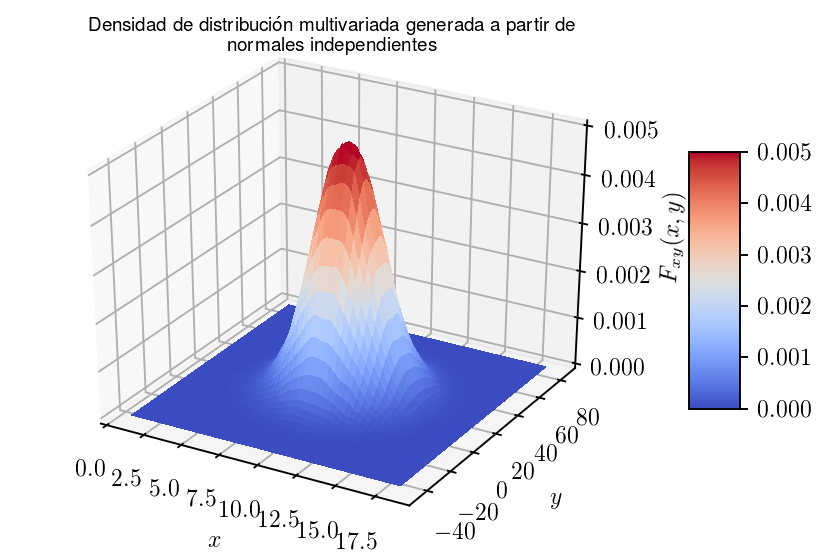

In [40]:
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm

fig = plt.figure(dpi=170)
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, vmin = 0, vmax = 0.005)
plt.title("Densidad de distribución multivariada generada a partir de \n normales independientes", size=8)
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
ax.set_zlabel(r"$F_{xy}(x,y)$")
ax.set_zlim(0, 0.005)
fig.colorbar(surface, shrink=0.5, aspect=5)
plt.show()

# Ejercicio 7

Aplicar el test de Kolmogorov-Smirnov a uno de los generadores de números al azar con distribución normal univariada
generado en el ejercicio 6. Utilizar un nivel de significación del 5%, y probar con distintos tamaños de muestras, analizar el
resultado, e indicar si la distribución puede o no ser aceptada.

Dada una cantidad finita de observaciones de la variable continua X, con distribución normal univariabda, obtenemos la aproximación empírica a la función acumulativa

$$F(x) \approx \hat{F}(x) = \frac{\# x_i \leq x}{n}$$

De la aproximación empírica a la función acumulativa, resulta:

In [41]:
def empiric_distribution_function(x, sample):
    count = 0
    for xi in sample:
        if xi <= x:
            count += 1
    return count / len(sample)

Medimos la distancia a la función real $F(x)$

$$ q = max_x \mid \hat{F}(x) - F(x) \mid $$

In [42]:
#Funciones auxiliares
from scipy.stats import norm

def generate_empiric_distribution_values(sample):
    empiric_distribution_values = []
    for xi in sample:
        empiric_distribution_values.append(empiric_distribution_function(xi, sample))
        
    return empiric_distribution_values

def generate_expected_distribution_values(sample):
    expected_distribution_values = []
    for xi in sample:
        expected_distribution_values.append(norm(10, 2).cdf(xi))

    return expected_distribution_values

def calculate_q(empiric_distribution_values, expected_distribution_values):
    distributions_differences = []

    for i in range(len(empiric_distribution_values)):
        distributions_differences.append(abs(empiric_distribution_values[i] - expected_distribution_values[i]))
        
    return max(distributions_differences)

def calculate_q_alpha(alpha, sample_len):
    return (-1/sample_len * math.log(alpha/2))**(1/2)

In [43]:
#Test de Kolmogorox-Smirnov
def kolmogorov_smirnov_test(alpha, sample):
    empiric_distribution_values = generate_empiric_distribution_values(sample)
    expected_distribution_values = generate_expected_distribution_values(sample)
    
    q = calculate_q(empiric_distribution_values, expected_distribution_values)    
    q_alpha = calculate_q_alpha(alpha, len(sample))
    
    print('Test Kolmogorov-Smirnov con alpha: {} y {} samples'.format(alpha, len(sample)))
    print('\tq:', q)
    print('\tq_alpha:', q_alpha)
    
    print('Este test Kolmogorov-Smirnov nos permite rechazar la hipotesis nula: {}'.format(not (q > q_alpha)))

Ahora probamos con distintos tamanos de muestras

In [ ]:
alpha = 0.05 #por enunciado

kolmogorov_smirnov_test(alpha, muestra_normal_2_10[:1000]) 
print()
kolmogorov_smirnov_test(alpha, muestra_normal_2_10[:10000])
print()
kolmogorov_smirnov_test(alpha, muestra_normal_2_10[:75000])

Test Kolmogorov-Smirnov con alpha: 0.05 y 1000 samples
	q: 0.02108173503575439
	q_alpha: 0.060736146190830516
Este test Kolmogorov-Smirnov nos permite rechazar la hipotesis nula: True

Test Kolmogorov-Smirnov con alpha: 0.05 y 10000 samples
	q: 0.008137374818659004
	q_alpha: 0.019206455826398416
Este test Kolmogorov-Smirnov nos permite rechazar la hipotesis nula: True



No se rechaza la hipótesis $H_0$ si

$$q > \sqrt{-\frac{1}{2n}ln(\frac{\alpha}{2})}$$

Aplicando este test para muestras de distintos tamanos, nos indica que debemos rechazar la hipótesis $H_0$ para un nivel de significación del 5%. 

# Ejercicio 8

In [139]:
import random
import math
from typing import List, NamedTuple, Optional, NoReturn
import numpy as np

TAMAÑO_GRILLA = 250
PROBABILIDAD_CONTAGIO = 0.65
PROBABILIDAD_CONTAGIO_CUARENTENA = 0.15


def simularBernoulli(p) -> bool:
    return random.random() < p


def simularBernoulliMultivariada(probas: List[float]) -> int:
    numero = random.random()
    probas = sorted(probas)
    for i in range(len(probas)):
        if numero < probas[i]:
            return i


class Salud:
    def __init__(self, sano: bool, dias_desde_contagio: Optional[int]):
        self.sano = sano
        self.dias_desde_contagio = dias_desde_contagio
        
    def enfermar(self, recontagio):
        if self.dias_desde_contagio and not recontagio:
            return
        self.sano = False
        self.dias_desde_contagio = 0
        

class Movimiento:
    def __init__(self, tipo: str, dias_desde_ultimo_movimiento: int, puede_mover: bool):
        self.tipo = tipo
        self.dias_desde_ultimo_movimiento = dias_desde_ultimo_movimiento
        self.puede_mover = puede_mover
        
    def debo_mover(self) -> bool:
        if not self.puede_mover:
            return False
        if self.tipo == "A":
            return True
        elif self.tipo == "B":
            return False if self.dias_desde_ultimo_movimiento >= 2 else True
        elif self.tipo == "C":
            return False if self.dias_desde_ultimo_movimiento >= 4 else True
        return False
        

class Persona:
    
    def __init__(self, alpha, beta, sano, tipo, puede_mover):
        self.estado = Salud(sano=sano, dias_desde_contagio=None)
        self.alpha = alpha
        self.beta = beta
        self.movimiento = Movimiento(tipo=tipo, dias_desde_ultimo_movimiento=0, puede_mover=puede_mover)
        
    def avanzar(self) -> NoReturn:
        self.movimiento.dias_desde_ultimo_movimiento += 1
        if self.estado.sano:
            if self.estado.dias_desde_contagio:
                self.estado.dias_desde_contagio += 1
            return
        else:
            if self.estado.dias_desde_contagio:
                if self.estado.dias_desde_contagio >= self.alpha and simularBernoulli(self.beta):
                    self.estado.sano = True
                    return
                self.estado.dias_desde_contagio += 1
            else:
                self.estado.dias_desde_contagio = 1
    
    def sano(self) -> bool:
        return self.estado.sano
    
    def set_posicion(self, x, y):
        self.x = x
        self.y = y
        
    def mover(self, posiciones):
        if not self.movimiento.debo_mover():
            return
        posibles_movimientos = [(self.x+a, self.y+b) for a,b in [(1,0), (1,1), (0,1), (-1,1), (1,-1), (-1,-1), (-1,0), (0,-1)]]
        posibles_movimientos = [(a,b) for a,b in posibles_movimientos if a>=0 and a<TAMAÑO_GRILLA and b>=0 and b<TAMAÑO_GRILLA]
        random.shuffle(posibles_movimientos)
        for mov in posibles_movimientos:
            if posiciones[mov[0]][mov[1]]==None:
                self.movimiento.dias_desde_ultimo_movimiento = 0
                posiciones[mov[0]][mov[1]] = self
                posiciones[self.x][self.y] = None
                self.x = mov[0]
                self.y = mov[1]
                
    def contagiar(self, posiciones, p, recontagio):
        if self.estado.sano:
            return
        posibles_movimientos = [(self.x+a*mult, self.y+b*mult) for a,b in [(1,0), (1,1), (0,1), (-1,1), (1,-1), (-1,-1), (-1,0), (0,-1)] for mult in range(1,6)]
        posibles_movimientos = [(a,b) for a,b in posibles_movimientos if a>=0 and a<TAMAÑO_GRILLA and b>=0 and b<TAMAÑO_GRILLA]
        for mov in posibles_movimientos:
            if posiciones[mov[0]][mov[1]]==None:
                continue
            enferma = simularBernoulli(p)
            if enferma:
                posiciones[mov[0]][mov[1]].estado.enfermar(recontagio)
                

class SimuladorDePandemia:
    def __init__(self,N,alpha,beta,lambda_param,T,recontagio):
        sanos = int(math.floor(N*0.97))
        enfermos = N-sanos
        self.T = T
        self.personas = []
        self.recontagio = recontagio
        pueden_mover = [False for _ in range(int(lambda_param*N))]
        pueden_mover += [True for _ in range(N-len(pueden_mover))]
        random.shuffle(pueden_mover)
        for _ in range(sanos):
            multivariada = simularBernoulliMultivariada([0.1, 0.2, 0.7])
            persona = Persona(alpha, beta, True, ("C" if multivariada == 0 else ("B" if multivariada == 1 else "A") ), pueden_mover.pop(0))
            self.personas.append(persona)
        for _ in range(enfermos):
            multivariada = simularBernoulliMultivariada([0.1, 0.2, 0.7])
            persona = Persona(alpha, beta, False, ("C" if multivariada == 0 else ("B" if multivariada == 1 else "A") ), pueden_mover.pop(0))
            self.personas.append(persona)
        self.ubicaciones = [[None for _ in range(TAMAÑO_GRILLA)] for _ in range(TAMAÑO_GRILLA)]
        ubicaciones_aux = np.asarray(self.ubicaciones)
        empty_positions = np.argwhere(ubicaciones_aux==None).tolist()
        random.shuffle(empty_positions)
        for p in self.personas:
            pos = empty_positions.pop(0)
            p.set_posicion(pos[0], pos[1])
            self.ubicaciones[pos[0]][pos[1]] = p
            
    def capturar_instante(self) -> List[List]:
        instante = [u.copy() for u in self.ubicaciones.copy()]
        for i in range(TAMAÑO_GRILLA):
            for j in range(TAMAÑO_GRILLA):
                instante[i][j] = (lambda x: "Vacio" if not x else ("Sano" if x.sano() else "Enfer"))(instante[i][j])
        return instante
            
    def simular(self, pasos: int) -> List[List[List]]:
        instantes = []
        for i in range(pasos):
            for p in self.personas:
                p.avanzar()
            for p in self.personas:
                p.mover(self.ubicaciones)
            for p in self.personas:
                p.contagiar(self.ubicaciones, (PROBABILIDAD_CONTAGIO if i<self.T else PROBABILIDAD_CONTAGIO_CUARENTENA), self.recontagio)
            instantes.append(self.capturar_instante())
        return instantes


In [140]:
# 2000p 100d -> 5.47s

In [195]:
PERSONAS = 1500
ALPHA = 14
BETA = 0.2
INMOVILES = 0
TIEMPO_CUARENTENA = 1000
RECONTAGIO = True
DIAS = 5000

In [196]:
simulador = SimuladorDePandemia(PERSONAS, ALPHA, BETA, INMOVILES, TIEMPO_CUARENTENA, RECONTAGIO)
instantes = simulador.simular(DIAS)

In [197]:
from collections import Counter

def plot_instant(x):
    translate_dict = {"Vacio": 0, "Sano": 1, "Enfer": 2}
    fig, axs = plt.subplots(1, 2, dpi=200, figsize=(6.4*2, 4.8))
    instante = np.array(instantes[x])
    axs[0].imshow(np.vectorize(translate_dict.get)(instante), cmap=colors.ListedColormap(['gainsboro', 'cornflowerblue', 'firebrick']), interpolation='none')
    axs[0].scatter(np.argwhere(instante=="Sano")[:,1], np.argwhere(instante=="Sano")[:,0], color='cornflowerblue', label="Sanos", s=1)
    axs[0].scatter(np.argwhere(instante=="Enfer")[:,1], np.argwhere(instante=="Enfer")[:,0], color='firebrick', label="Enfermo", s=1)
    axs[0].set_yticks([])
    axs[0].set_xticks([])
    axs[0].legend()
    contadores = {}
    for i in range(0, len(instantes)):
        flatten = [e for l in instantes[i] for e in l if e!= "Vacio"]
        contadores[i] = Counter(flatten)
    axs[1].plot(list(sorted(contadores.keys())), [contadores[i]["Sano"] for i in range(0, len(instantes))], color='cornflowerblue', label="Sano")
    axs[1].plot(list(sorted(contadores.keys())), [contadores[i]["Enfer"] for i in range(0, len(instantes))], color='firebrick', label="Enfermo")
    axs[1].axvline(x, color='gainsboro')
    axs[1].axvline(TIEMPO_CUARENTENA, color='gold', label="Cuarentena")
    axs[1].set_ylabel("Cantidad")
    axs[1].set_xlabel("Instante [t]")
    axs[1].legend()
    plt.show()

interact(plot_instant, x=widgets.IntSlider(min=0, max=len(instantes)-1, step=1, value=0))

interactive(children=(IntSlider(value=0, description='x', max=4999), Output()), _dom_classes=('widget-interact…

<function __main__.plot_instant(x)>